In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from skimage import measure, morphology
import pydicom as dicom
import numpy as np
import cv2
import skimage.transform

#data path 수정
os.chdir("C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data")
os.getcwd()

'C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data'

In [2]:
# Setting base path
#ROOT_PATH = os.path.join(os.getcwd(), 'Dataset_csv')
#CBISDDSM_csvPATH = os.path.join('CBISDDSM')
#MIAS_PATH = os.path.join(ROOT_PATH, 'MIAS')

# Load Dataframe from .csv
calc_train = pd.read_csv(("calc_case_description_train_set.csv"), index_col=0)
calc_test = pd.read_csv(("calc_case_description_test_set.csv"), index_col=0)
mass_train = pd.read_csv(("mass_case_description_train_set.csv"), index_col=0)
mass_test = pd.read_csv(("mass_case_description_test_set.csv"), index_col=0)

In [3]:
#calc_case cropped image path 설정
roi_image = mass_train['ROI mask file path'].to_list()
crop_image=mass_train['cropped image file path'].to_list()

crop_image[:5]

['Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000000.dcm',
 'Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000000.dcm',
 'Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000000.dcm',
 'Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000000.dcm',
 'Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.341142631111685501338932932302380583774/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000000.dcm']

In [4]:
DDSM_dataPATH = './CBIS-DDSM'
roi_dir=[]
crop_dir=[]
    
for i in range(len(roi_image)):
    roi_dir.append(os.path.join(DDSM_dataPATH, roi_image[i]).replace('\n', '').replace('\r', ''))
    crop_dir.append(os.path.join(DDSM_dataPATH, crop_image[i]).replace('\n', '').replace('\r', ''))
    
crop_dir[:10]

['./CBIS-DDSM\\Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000000.dcm',
 './CBIS-DDSM\\Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000000.dcm',
 './CBIS-DDSM\\Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000000.dcm',
 './CBIS-DDSM\\Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000000.dcm',
 './CBIS-DDSM\\Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.341142631111685501338932932302380583774/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000000.dcm',
 './CBIS-DDSM\\Mass-Training_P_00009_RIGHT_CC_1

In [5]:
y=mass_train['pathology']
y.unique()

array(['mass_MALIGNANT', 'mass_BENIGN', 'mass_CALLBACK'], dtype=object)

In [10]:
# roi_images=[]
# for i in range(len(roi_dir)):
#     d = dicom.dcmread(roi_dir[i])
#     image=d.pixel_array
#     roi_images.append(image)

crop_images=[]
for i in range(len(crop_dir)):
    try:
        d = dicom.dcmread(crop_dir[i])
        image=d.pixel_array
        crop_images.append(image)
    except Exception:
        print(i)
        print("error")

9
error
10
error


In [11]:
len(crop_images)

1316

In [8]:
mass_case_train=[]
mass_label=[]

for i in range(len(roi_images)):
    if roi_images[i].size < 1000000:
        mass_case_train.append(roi_images[i])
        mass_label.append(y[i])
    else:
        continue

In [12]:
for i in range(len(crop_images)):
    if crop_images[i].size < 1000000:
        mass_case_train.append(crop_images[i])
        mass_label.append(y[i])
    else:
        continue

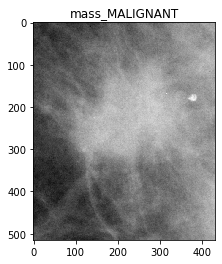

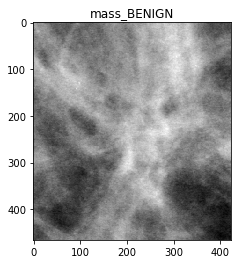

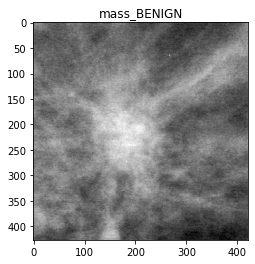

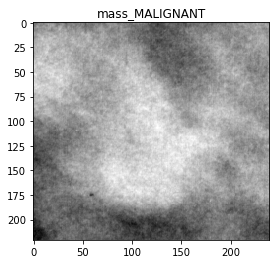

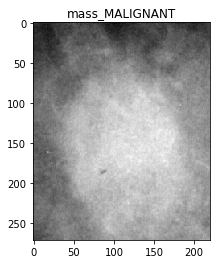

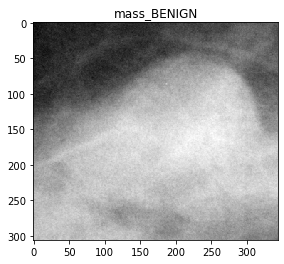

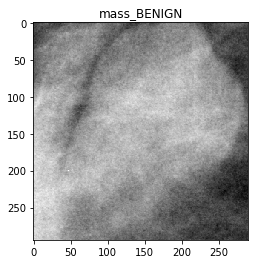

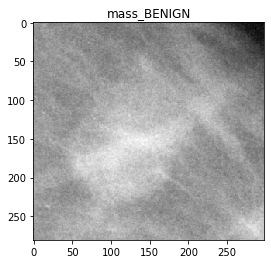

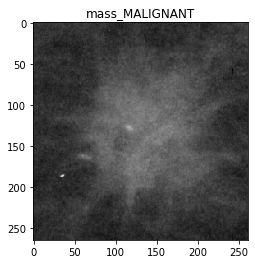

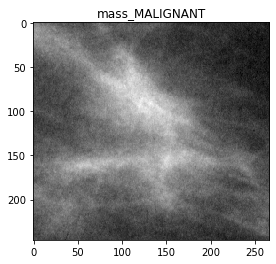

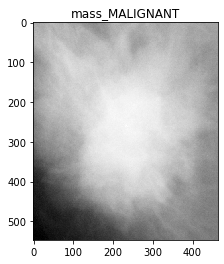

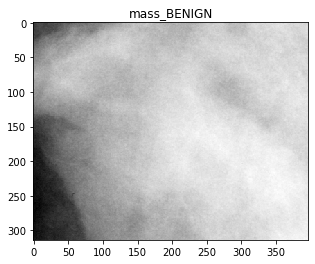

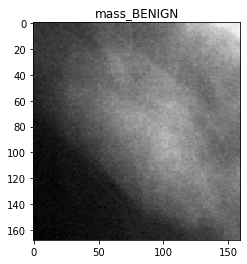

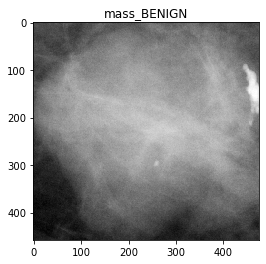

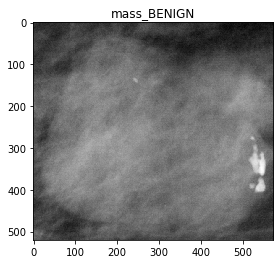

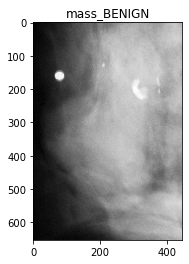

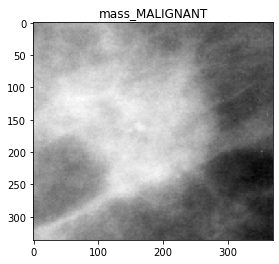

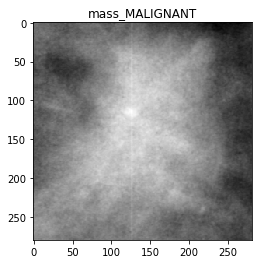

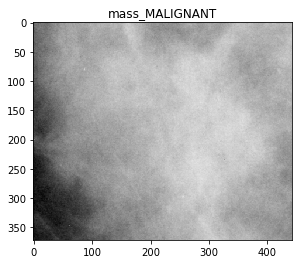

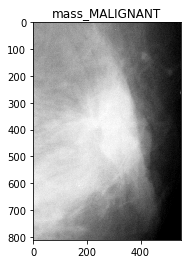

In [16]:
for i in range(20):
    plt.title(mass_label[i])
    plt.imshow(mass_case_train[i],cmap='gray')
    plt.show()

In [13]:
print(len(mass_case_train))
print(len(mass_label))

1316
1316


In [14]:
np.save('mass_train.npy',mass_case_train)

In [15]:
np.save('mass_train_label.npy',mass_label)